In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os, time 


In [55]:
mnist = tf.keras.datasets.mnist

In [56]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [57]:
X_train_full.shape

(60000, 28, 28)

In [58]:
#Checking random image
X_train_full[2300]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  26, 216, 176,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         27, 210, 254, 155,   5,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         90, 254, 230,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,
        206, 252, 120,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

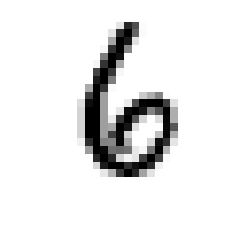

In [59]:
plt.imshow(X_train_full[2300], cmap="binary")
plt.axis("off")
plt.show()

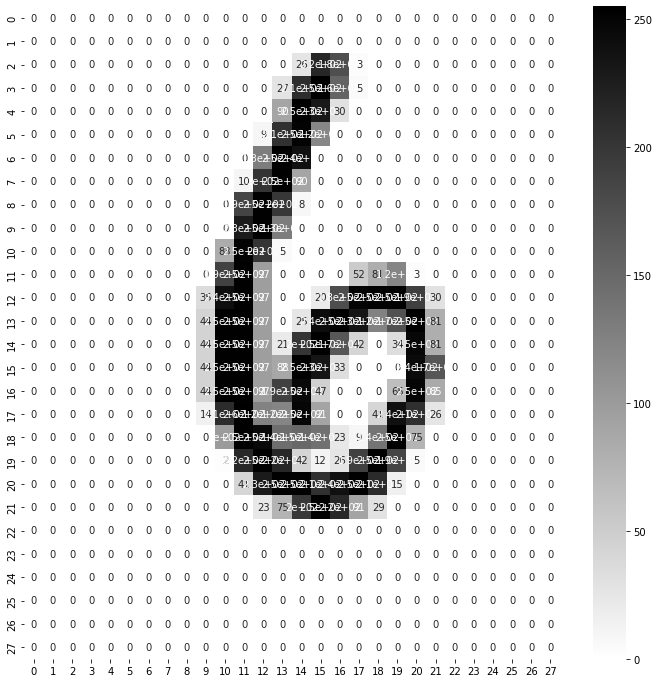

In [60]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[2300], annot=True, cmap="binary")
plt.show()

In [61]:
# Unit Scaling... Scale the data b/w 0 to 1 by dividing by 255.
# We scaling to fasten our training.

X_valid, X_train = X_train_full[:5000] / 255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000] / 255. , y_train_full[5000:]

In [62]:
# Scale the test data

X_test = X_test/255.

In [63]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


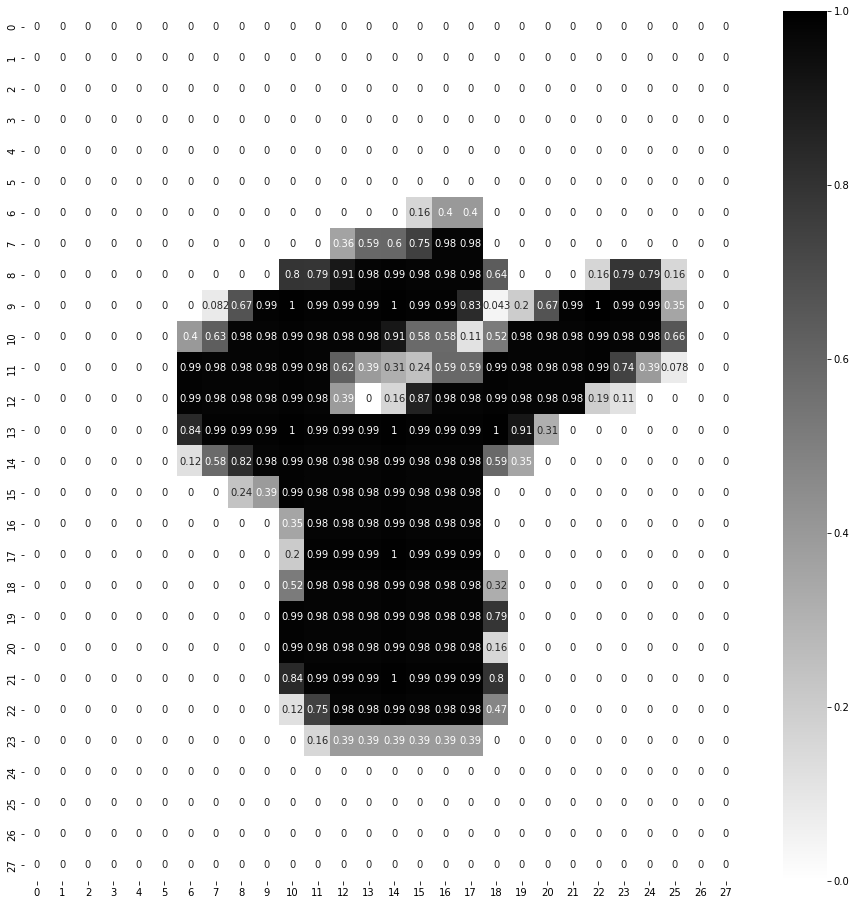

In [64]:
plt.figure(figsize=(16,16))
sns.heatmap(X_train[2300], annot=True, cmap="binary")

In [65]:
# We need to flatten it. That means making it 1D array as vertical input layer for Neural Network.

LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name="InputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")    #10 becoz we have 10 image outputs
]

In [66]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [67]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [68]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS = ['accuracy']

In [69]:
model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)


In [70]:
model_clf.layers[1].name 

'HiddenLayer1'

In [71]:
hidden1 = model_clf.layers[1]

In [72]:
# Getting weights and bias

weights, biases = hidden1.get_weights()

In [73]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2132 - accuracy: 0.9361 - val_loss: 10.3613 - val_accuracy: 0.0956
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9725 - val_loss: 12.5900 - val_accuracy: 0.0956
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9807 - val_loss: 17.9305 - val_accuracy: 0.0936
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9855 - val_loss: 18.5975 - val_accuracy: 0.0952
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0337 - accuracy: 0.9885 - val_loss: 21.2423 - val_accuracy: 0.0942


In [74]:
# Saving Model

def saveModel_path(model_dir="/content/SAVED_MODELS/"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"Your model path: {model_path}")
    return model_path

In [75]:
model_clf.save(saveModel_path())

Your model path: /content/SAVED_MODELS/Model_2023_01_27_11_32_39_.h5


In [76]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [77]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.213191,0.936055,10.361266,0.0956
1,0.088338,0.972527,12.590037,0.0956
2,0.060254,0.980691,17.930506,0.0936
3,0.044991,0.985491,18.597536,0.0952
4,0.033722,0.988455,21.242310,0.0942


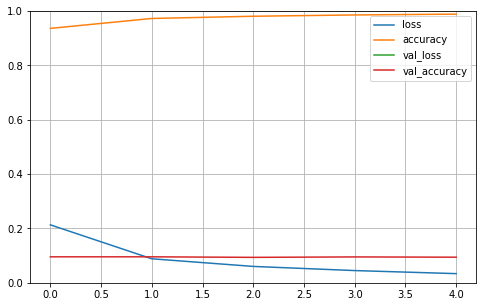

In [78]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [79]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9774


[0.08098214864730835, 0.977400004863739]

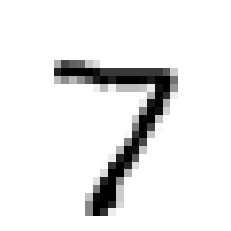

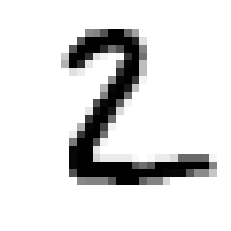

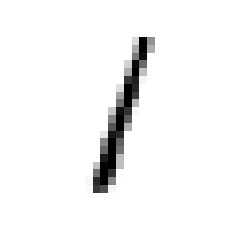

In [80]:
for i in range(0,3):
  plt.imshow(X_test[i], cmap="binary")
  plt.axis("off")
  plt.show()

In [81]:
#Single value prediction

prediction = model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 59ms/step


In [82]:
# Softmax function gave us probability of all classes and we need to pick max one.

prediction[0]

array([2.4295903e-09, 4.8858510e-07, 1.1512418e-05, 1.6478193e-06,
       1.6711136e-11, 4.2880689e-08, 6.8975597e-10, 9.9998415e-01,
       1.6247943e-06, 5.6732239e-07], dtype=float32)

In [83]:
y_prob = prediction[0]

In [84]:
# We can see 7th is giving us 1 which means it's an image with number 7 

y_prob.round(5)

array([0.0000e+00, 0.0000e+00, 1.0000e-05, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 9.9998e-01, 0.0000e+00, 0.0000e+00],
      dtype=float32)

In [85]:
np.argmax(y_prob.round(5))

7

In [86]:
y_prob = prediction[1]
np.argmax(y_prob.round(5))

2

# Tensorboard

In [88]:
def get_log_path(log_dir="/content/logs/fit"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    log_path = os.path.join(log_dir, fileName)
    print(f"Saving logs at: {log_path}")
    return log_path

log_dir = get_log_path()
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Saving logs at: /content/logs/fit/log_2023_01_27_11_42_50


In [89]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,
                        callbacks=[tensorboard_callback])

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 21.6438 - val_accuracy: 0.0956
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 25.2783 - val_accuracy: 0.0946
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 27.5063 - val_accuracy: 0.0948
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 25.9041 - val_accuracy: 0.0950
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 27.4571 - val_accuracy: 0.0952


In [90]:
%load_ext tensorboard

In [91]:
%reload_ext tensorboard

In [92]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>